# Linear regression via gradient descent

We want to find the vector $\theta$ that minimizes the loss/cost function $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$, where $h_\theta(x^{(i)}) = \theta^T X_i$.

Gradient descent begins with $\theta_{0}$, some initial value(s) for elements $j=0, ..., n$, then updates $\theta$ iteratively such that $\theta_j := \theta_j - \alpha \dfrac{\partial J(\theta)}{\partial \theta_j}$, where $\alpha$ is a learning rate or step size parameter. In this way, we are taking first order steps along the gradient towards (hopefully) the region with lower $J(\theta)$.

The partial derivative of the cost function with respect to parameter $\theta_j$ is $\dfrac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$, which means that the update rule can be written as $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sample size
N = 200
# number of params
npar = 2
n = npar + 1 # ncol in X

# make design matrix
intercept = np.repeat(1, N)
x = np.random.rand(N, npar)
X = np.column_stack((intercept, x))

# true parameter vector
beta = np.random.normal(0, 1, n)

mu_y = np.dot(X, beta)
sigma = 1
y = np.random.normal(mu_y, sigma, N)

Now, we can initialize the parameters at some random, dispersed values, choose the learning rate, and iteratively update our parameter vector using gradient descent. Again, the update rule is $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.

In [8]:
# choose initial values for theta
theta = np.random.normal(0, 3, n)

# choose learning rate/stepsize parameter 
alpha = .005

# iteratively update parameter vector 
iters = 100
theta_out = np.empty([iters, n])
val = np.empty(N)

for it in range(0, iters):
    theta_out[it, ] = theta
    for j in range(0, n):
        for i in range(0, N):
            val[i] = (np.dot(np.transpose(theta_out[it, ]), X[i, ]) - y[i]) * X[i, j]
        theta[j] = theta[j] - alpha * sum(val)

Last, plot the results to evaluate convergence and parameter recovery.

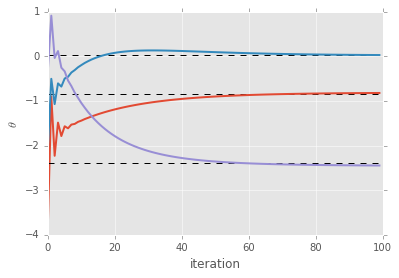

In [9]:
for i in range(0, n):
    plt.axhline(beta[i], linestyle = 'dashed', color='black')
    plt.plot(range(0, iters), theta_out[:, i], lw=2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')